In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
telcoData = pd.read_csv('telco_dataset.csv')

In [3]:
telcoData.loc[0]

Customer_ID                                  0917-2849660931
subscription_type                                   postpaid
start_date                                        04/06/2010
years_active                                             9.3
no_of_other_postpaid_accounts                              0
frequent_availed_top_up_amount_30days                    116
postpaid_plan_30days                                     999
monthly_revenue                                         1115
no_of_top_ups_30days                                       1
last_date_top_up                                   5/19/2019
days_since_last_two_top_ups                               20
cellsite                                                CN-7
no_of_days_subscribed_to_Call_Text_30days                 30
no_of_days_subscribed_to_GoSurf_30days                    30
no_of_days_subscribed_to_GoWatch_30days                   19
no_of_days_subscribed_to_OtherApps_30days                 23
total_hours_internet_usa

In [4]:
telcoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Customer_ID                                2000 non-null   object 
 1   subscription_type                          2000 non-null   object 
 2   start_date                                 2000 non-null   object 
 3   years_active                               2000 non-null   float64
 4   no_of_other_postpaid_accounts              2000 non-null   int64  
 5   frequent_availed_top_up_amount_30days      2000 non-null   int64  
 6   postpaid_plan_30days                       2000 non-null   int64  
 7   monthly_revenue                            2000 non-null   int64  
 8   no_of_top_ups_30days                       2000 non-null   int64  
 9   last_date_top_up                           2000 non-null   object 
 10  days_since_last_two_top_

In [5]:
print(telcoData.columns)
print('Number of Columns: '+str(len(telcoData.columns)))

Index(['Customer_ID', 'subscription_type', 'start_date', 'years_active',
       'no_of_other_postpaid_accounts',
       'frequent_availed_top_up_amount_30days', 'postpaid_plan_30days',
       'monthly_revenue', 'no_of_top_ups_30days', 'last_date_top_up',
       'days_since_last_two_top_ups', 'cellsite',
       'no_of_days_subscribed_to_Call_Text_30days',
       'no_of_days_subscribed_to_GoSurf_30days',
       'no_of_days_subscribed_to_GoWatch_30days',
       'no_of_days_subscribed_to_OtherApps_30days',
       'total_hours_internet_usage_30days',
       'total_hours_OtherApps_usage_30days', 'no_of_failed_Call_Text_30days',
       'no_of_failed_Surfing_30days', 'no_of_failed_143hotline_30days',
       'no_of_call_records_Complaint_30days',
       'mins_of_call_records_Complaint_30days', 'no_of_logged_GlobeOne_30days',
       'Survey_Score'],
      dtype='object')
Number of Columns: 25


In [6]:
telcoData = telcoData.drop(['start_date', 'last_date_top_up', 'cellsite'], axis=1)
data = telcoData

In [7]:
def subType(a):
    if (a=="postpaid"):
        return 10
    else:
        return 5
    
def yearActive(a):
    if (a < 1):
        return 5
    if ((a >= 1) and (a<=2)):
        return 6
    if ((a >2) and (a<=4)):
        return 7
    if ((a > 4) and (a<=6)):
        return 8
    if ((a > 6) and (a<= 8)):
        return 9
    else:
        return 10

def postpaidAcc(a):
    if(a>=0 and a<=1):
        return 8
    if(a>=2 and a<=3):
        return 9
    else:
        return 10

In [8]:
def topUpAmountMonth(a):
    if (a == 0):
        return 0
    if(a>0 and a <= 50):
        return 3
    if(a>50 and a<=100):
        return 5
    if(a>100 and a<=200):
        return 7
    if(a>200 and a<=300):
        return 8
    if(a>300 and a<=500):
        return 9
    else:
        return 10

def topUpMonth(a):
    if (a==0):
        return 0
    if(a==1):
        return 5
    if(a==2):
        return 6
    if(a>=3 and a<=4):
        return 7
    if(a>=5 and a<=7):
        return 9
    else:
        return 10

def daySinceTopup(a):
    if (a>51):
        return 0
    if(a>=41 and a<=50):
        return 3
    if(a>=31 and a<=40):
        return 5
    if(a>=22 and a<=30):
        return 7
    if(a>=15 and a<=21):
        return 8
    if(a>=10 and a<=14):
        return 9
    else:
        return 10

In [9]:
def callAndText(a):
    if (a==0):
        return 0
    if(a>=1 and a<=2):
        return 3
    if(a>=3 and a<=7):
        return 5
    if(a>= 8 and a<=14):
        return 7
    if(a>=15 and a<=20):
        return 8
    if(a>=21 and a<=29):
        return 9
    else:
        return 10

def goSurf(a):
    if (a==0):
        return 0
    if(a>=1 and a<=2):
        return 3
    if(a>=3 and a<=7):
        return 5
    if(a>= 8 and a<=14):
        return 7
    if(a>=15 and a<=20):
        return 8
    if(a>=21 and a<=29):
        return 9
    else:
        return 10

def goWatch(a):
    if (a>=0 and a<=2):
        return 5
    if(a>=3 and a<=7):
        return 6
    if(a>=8 and a<=14):
        return 7
    if(a>=15 and a<=20):
        return 8
    if(a>=21 and a<=29):
        return 9
    else:
        return 10
    
def otherApps(a):
    if (a>=0 and a<=2):
        return 5
    if(a>=3 and a<=7):
        return 6
    if(a>=8 and a<=14):
        return 7
    if(a>=15 and a<=20):
        return 8
    if(a>=21 and a<=29):
        return 9
    else:
        return 10

In [10]:
def fCallAndText(a):
    if (a>29):
        return 0
    if(a>=26 and a<=28):
        return 1
    if(a>=21 and a<=25):
        return 3
    if(a>=16 and a<=20):
        return 5
    if(a>=11 and a<=15):
        return 7
    if(a>=6 and a<=10):
        return 9
    else:
        return 10

def fSurf(a):
    if (a>29):
        return 0
    if(a>=26 and a<=28):
        return 1
    if(a>=21 and a<=25):
        return 3
    if(a>=16 and a<=20):
        return 5
    if(a>=11 and a<=15):
        return 7
    if(a>=6 and a<=10):
        return 9
    else:
        return 10

def fHotline(a):
    if (a>29):
        return 0
    if(a>=26 and a<=28):
        return 1
    if(a>=21 and a<=25):
        return 3
    if(a>=16 and a<=20):
        return 5
    if(a>=11 and a<=15):
        return 7
    if(a>=6 and a<=10):
        return 9
    else:
        return 10

In [11]:
def noCallRecord(a):
    if (a == 10):
        return 0
    if(a>=8 and a<=9):
        return 2
    if(a>=6 and a<= 7):
        return 5
    if(a>=4 and a<=5):
        return 7
    if(a>=2 and a<=3):
        return 9
    else:
        return 10
    
def minCallRecord(a):
    if(a > 25):
        return 0
    if(a>=21 and a<=25):
        return 2
    if(a>=16 and a<=20):
        return 4
    if(a>=11 and a<=15):
        return 6
    if(a>=6 and a<=10):
        return 8
    if(a>=1 and a<=5):
        return 9
    else:
        return 10
    
def noGlobeOne(a):
    if (a >= 0 and a <= 2):
        return 5
    if(a>=3 and a<=7):
        return 6
    if(a>=8 and a<=14):
        return 7
    if(a>=15 and a<=20):
        return 8
    if(a>=21 and a<=29):
        return 9
    else:
        return 10


### Replacing data

In [12]:
for i in range(len(data)):
    #User
    data['subscription_type'][i] = subType(data['subscription_type'][i])
    data['years_active'][i] = yearActive(data['years_active'][i])
    data['no_of_other_postpaid_accounts'][i] = postpaidAcc(data['no_of_other_postpaid_accounts'][i])
    
    #Load
    data['frequent_availed_top_up_amount_30days'][i] = topUpAmountMonth(data['frequent_availed_top_up_amount_30days'][i])
    data['no_of_top_ups_30days'][i] = topUpMonth(data['no_of_top_ups_30days'][i])
    data['days_since_last_two_top_ups'][i] = daySinceTopup(data['days_since_last_two_top_ups'][i])
    
    #Sub
    data['no_of_days_subscribed_to_Call_Text_30days'][i] = callAndText(data['no_of_days_subscribed_to_Call_Text_30days'][i])
    data['no_of_days_subscribed_to_GoSurf_30days'][i] = goSurf(data['no_of_days_subscribed_to_GoSurf_30days'][i])
    data['no_of_days_subscribed_to_GoWatch_30days'][i] = goWatch(data['no_of_days_subscribed_to_GoWatch_30days'][i])
    data['no_of_days_subscribed_to_OtherApps_30days'][i] = otherApps(data['no_of_days_subscribed_to_OtherApps_30days'][i])
    
    #Customer Exp
    data['no_of_failed_Call_Text_30days'][i] = fCallAndText(data['no_of_failed_Call_Text_30days'][i])
    data['no_of_failed_Surfing_30days'][i] = fSurf(data['no_of_failed_Surfing_30days'][i])
    data['no_of_failed_143hotline_30days'][i] = fHotline(data['no_of_failed_143hotline_30days'][i])
    
    #Customer Engage
    data['no_of_call_records_Complaint_30days'][i] = noCallRecord(data['no_of_call_records_Complaint_30days'][i])
    data['mins_of_call_records_Complaint_30days'][i] = minCallRecord(data['mins_of_call_records_Complaint_30days'][i])
    data['no_of_logged_GlobeOne_30days'][i] = noGlobeOne(data['no_of_logged_GlobeOne_30days'][i])

<ipython-input-12-891e2e3fa196>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subscription_type'][i] = subType(data['subscription_type'][i])
<ipython-input-12-891e2e3fa196>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['years_active'][i] = yearActive(data['years_active'][i])
<ipython-input-12-891e2e3fa196>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no_of_other_postpaid_accounts'][i] = postpaidAcc(data['no_o

In [13]:
data

,Customer_ID,subscription_type,years_active,no_of_other_postpaid_accounts,frequent_availed_top_up_amount_30days,postpaid_plan_30days,monthly_revenue,no_of_top_ups_30days,days_since_last_two_top_ups,no_of_days_subscribed_to_Call_Text_30days,...,no_of_days_subscribed_to_OtherApps_30days,total_hours_internet_usage_30days,total_hours_OtherApps_usage_30days,no_of_failed_Call_Text_30days,no_of_failed_Surfing_30days,no_of_failed_143hotline_30days,no_of_call_records_Complaint_30days,mins_of_call_records_Complaint_30days,no_of_logged_GlobeOne_30days,Survey_Score
0,0917-2849660931,10,10.0,8,7,999,1115,5,8,10,...,9,234,234,5,5,9,7,9,7,7
1,0917-3521446959,5,8.0,8,5,0,300,6,0,8,...,6,136,20,1,5,7,7,2,7,3
2,0917-6526588656,10,6.0,8,7,599,799,5,8,10,...,9,139,247,10,10,9,2,6,7,0
3,0917-8987002220,5,8.0,8,8,0,499,6,10,9,...,9,78,119,5,1,3,7,0,8,0
4,0917-5353179110,5,9.0,8,5,0,400,9,3,5,...,5,258,113,0,7,9,9,9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0917-6727942919,5,7.0,8,3,0,121,9,0,5,...,5,108,198,3,10,7,9,4,9,0
1996,0917-5368175047,5,7.0,8,5,0,300,6,8,9,...,8,127,131,1,3,9,7,6,9,0
1997,0917-2926128343,5,8.0,8,3,0,182,5,0,3,...,5,229,183,5,7,5,5,9,9,0
1998,0917-1377056193,5,8.0,8,5,0,400,6,0,7,...,6,176,63,9,5,5,7,6,6,0


In [14]:
userProfile=[]
loadProfile = []
subscriptionProfile = []
customerExperience = []
customerSupportEngagement = []
customerHappiness=[]

for i in range(len(data)):
    a = 0
    b = 0
    c = 0
    d = 0
    e = 0
    f = 0
    
    a = data['subscription_type'][i]+data['years_active'][i]+data['no_of_other_postpaid_accounts'][i]
    b = data['frequent_availed_top_up_amount_30days'][i]+data['no_of_top_ups_30days'][i]+data['days_since_last_two_top_ups'][i]
    c = data['no_of_days_subscribed_to_Call_Text_30days'][i]+data['no_of_days_subscribed_to_GoSurf_30days'][i]+data['no_of_days_subscribed_to_GoWatch_30days'][i]+data['no_of_days_subscribed_to_OtherApps_30days'][i]
    d = data['no_of_failed_Call_Text_30days'][i]+data['no_of_failed_Surfing_30days'][i]+data['no_of_failed_143hotline_30days'][i]
    e = data['no_of_call_records_Complaint_30days'][i]+data['mins_of_call_records_Complaint_30days'][i]+data['no_of_logged_GlobeOne_30days'][i]
    f = ((a+b+c+d+e+f)/160)*100
    
    userProfile.append(a)
    loadProfile.append(b)
    subscriptionProfile.append(c)
    customerExperience.append(d)
    customerSupportEngagement.append(e)
    customerHappiness.append(f)

In [15]:
newHappinessIndexDataset = pd.DataFrame()

In [16]:
newHappinessIndexDataset['Customer ID'] = data['Customer_ID']
newHappinessIndexDataset['User Profile'] = userProfile
newHappinessIndexDataset['Load Profile'] = loadProfile
newHappinessIndexDataset['Subscription Profile'] = subscriptionProfile
newHappinessIndexDataset['Customer Experience'] = customerExperience
newHappinessIndexDataset['Customer Support Engagement'] = customerSupportEngagement
newHappinessIndexDataset['Customer Happiness'] = customerHappiness

In [17]:
newHappinessIndexDataset

,Customer ID,User Profile,Load Profile,Subscription Profile,Customer Experience,Customer Support Engagement,Customer Happiness
0,0917-2849660931,28.0,20,37,19,23,79.375
1,0917-3521446959,21.0,11,29,13,16,56.250
2,0917-6526588656,24.0,20,36,29,15,77.500
3,0917-8987002220,21.0,24,33,9,15,63.750
4,0917-5353179110,22.0,17,25,16,23,64.375
...,...,...,...,...,...,...,...
1995,0917-6727942919,20.0,12,21,20,22,59.375
1996,0917-5368175047,20.0,19,31,13,22,65.625
1997,0917-2926128343,21.0,8,16,17,23,53.125
1998,0917-1377056193,21.0,11,31,19,19,63.125


In [18]:
customerHappinessLevel = []

for i in range(len(newHappinessIndexDataset)):
    level = newHappinessIndexDataset['Customer Happiness'][i]
    if level<=100 and level >=91:
        customerHappinessLevel.append('Very Happy')
    elif level<=91 and level >=75:
        customerHappinessLevel.append('Happy')
    elif level<=74 and level>=60:
        customerHappinessLevel.append('Neutral')
    elif level<=59 and level>=50:
        customerHappinessLevel.append('Not Happy')
    else:
        customerHappinessLevel.append('Not Very Happy')

newHappinessIndexDataset['Happiness-index'] = customerHappinessLevel

In [19]:
newHappinessIndexDataset

,Customer ID,User Profile,Load Profile,Subscription Profile,Customer Experience,Customer Support Engagement,Customer Happiness,Happiness-index
0,0917-2849660931,28.0,20,37,19,23,79.375,Happy
1,0917-3521446959,21.0,11,29,13,16,56.250,Not Happy
2,0917-6526588656,24.0,20,36,29,15,77.500,Happy
3,0917-8987002220,21.0,24,33,9,15,63.750,Neutral
4,0917-5353179110,22.0,17,25,16,23,64.375,Neutral
...,...,...,...,...,...,...,...,...
1995,0917-6727942919,20.0,12,21,20,22,59.375,Not Very Happy
1996,0917-5368175047,20.0,19,31,13,22,65.625,Neutral
1997,0917-2926128343,21.0,8,16,17,23,53.125,Not Happy
1998,0917-1377056193,21.0,11,31,19,19,63.125,Neutral


In [20]:
newHappinessIndexDataset.to_csv('dataset-happiness-index.csv',index=False)

In [21]:
newHappinessIndexDataset = pd.read_csv('dataset-happiness-index.csv')

In [22]:
newHappinessIndexDataset

,Customer ID,User Profile,Load Profile,Subscription Profile,Customer Experience,Customer Support Engagement,Customer Happiness,Happiness-index
0,0917-2849660931,28.0,20,37,19,23,79.375,Happy
1,0917-3521446959,21.0,11,29,13,16,56.250,Not Happy
2,0917-6526588656,24.0,20,36,29,15,77.500,Happy
3,0917-8987002220,21.0,24,33,9,15,63.750,Neutral
4,0917-5353179110,22.0,17,25,16,23,64.375,Neutral
...,...,...,...,...,...,...,...,...
1995,0917-6727942919,20.0,12,21,20,22,59.375,Not Very Happy
1996,0917-5368175047,20.0,19,31,13,22,65.625,Neutral
1997,0917-2926128343,21.0,8,16,17,23,53.125,Not Happy
1998,0917-1377056193,21.0,11,31,19,19,63.125,Neutral


In [23]:
predictionData = newHappinessIndexDataset
predictionData = predictionData.drop('Customer ID', axis=1)
predictionData

,User Profile,Load Profile,Subscription Profile,Customer Experience,Customer Support Engagement,Customer Happiness,Happiness-index
0,28.0,20,37,19,23,79.375,Happy
1,21.0,11,29,13,16,56.250,Not Happy
2,24.0,20,36,29,15,77.500,Happy
3,21.0,24,33,9,15,63.750,Neutral
4,22.0,17,25,16,23,64.375,Neutral
...,...,...,...,...,...,...,...
1995,20.0,12,21,20,22,59.375,Not Very Happy
1996,20.0,19,31,13,22,65.625,Neutral
1997,21.0,8,16,17,23,53.125,Not Happy
1998,21.0,11,31,19,19,63.125,Neutral


In [24]:
x = predictionData
x = x.drop('Customer Happiness', axis=1)
x = x.drop('Happiness-index', axis=1)
y = predictionData['Happiness-index']
x

,User Profile,Load Profile,Subscription Profile,Customer Experience,Customer Support Engagement
0,28.0,20,37,19,23
1,21.0,11,29,13,16
2,24.0,20,36,29,15
3,21.0,24,33,9,15
4,22.0,17,25,16,23
...,...,...,...,...,...
1995,20.0,12,21,20,22
1996,20.0,19,31,13,22
1997,21.0,8,16,17,23
1998,21.0,11,31,19,19


In [25]:
y

0                Happy
1            Not Happy
2                Happy
3              Neutral
4              Neutral
             ...      
1995    Not Very Happy
1996           Neutral
1997         Not Happy
1998           Neutral
1999    Not Very Happy
Name: Happiness-index, Length: 2000, dtype: object

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Using decision tree classifier

In [27]:
decisionTree = DecisionTreeClassifier()
decisionTree = decisionTree.fit(X_train,y_train)
y_pred = decisionTree.predict(X_test)

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.795


## Using C-SVC with train-test split and cross-validation for validation method

In [29]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = StratifiedKFold(n_splits=10, shuffle = True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',refit = True,error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.964375 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.921875 (0.006404) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.964375 (0.013419) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.616875 (0.002864) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.921250 (0.005728) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.950000 (0.007395) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.616875 (0.002864) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.918125 (0.005896) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.938750 (0.012119) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.616875 (0.002864) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.920000 (0.004677) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.841875 (0.018551) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.616875 (0.002864) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.921250 (0.003062) with: {'C': 0.01, 'gamma': 'scale', 

In [30]:
y_pred = grid_result.predict(X_test)

print("SVC Test Classification Report:\n",metrics.classification_report(y_test, y_pred, digits=5))

SVC Test Classification Report:
                 precision    recall  f1-score   support

         Happy    0.98039   0.98039   0.98039        51
       Neutral    0.98394   0.98394   0.98394       249
     Not Happy    0.89744   0.95890   0.92715        73
Not Very Happy    0.63636   0.51852   0.57143        27

      accuracy                        0.94750       400
     macro avg    0.87453   0.86044   0.86573       400
  weighted avg    0.94424   0.94750   0.94528       400



# Using Logistic Regression

In [31]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

K:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

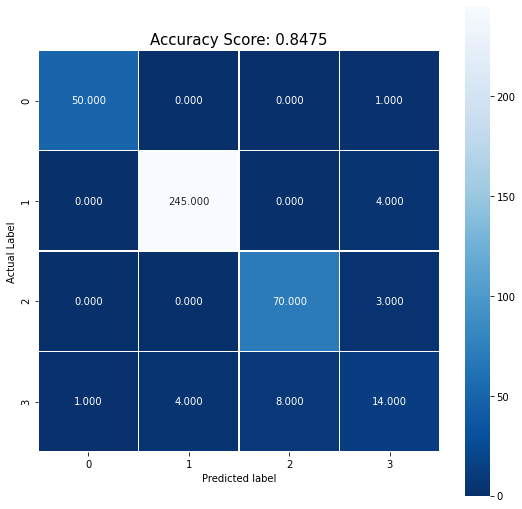

In [32]:
plt.figure(figsize=(9,9))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logReg.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [33]:
columns = telcoData.columns.to_list()
columns

['Customer_ID',
 'subscription_type',
 'years_active',
 'no_of_other_postpaid_accounts',
 'frequent_availed_top_up_amount_30days',
 'postpaid_plan_30days',
 'monthly_revenue',
 'no_of_top_ups_30days',
 'days_since_last_two_top_ups',
 'no_of_days_subscribed_to_Call_Text_30days',
 'no_of_days_subscribed_to_GoSurf_30days',
 'no_of_days_subscribed_to_GoWatch_30days',
 'no_of_days_subscribed_to_OtherApps_30days',
 'total_hours_internet_usage_30days',
 'total_hours_OtherApps_usage_30days',
 'no_of_failed_Call_Text_30days',
 'no_of_failed_Surfing_30days',
 'no_of_failed_143hotline_30days',
 'no_of_call_records_Complaint_30days',
 'mins_of_call_records_Complaint_30days',
 'no_of_logged_GlobeOne_30days',
 'Survey_Score']

In [34]:
print("Enter the following infomation.")
print("")

subscriptionType = input('Subscription type: ')
yearsActive = float(input('Years active: '))
postpaidAccounts = int(input('Number of other postpaid accounts: '))
freqTopups = int(input('Frequent availed top up amount per month: '))
postpaidPlan = int(input('Monthly Postpaid Plan: '))
revenue = int(input('Monthly Revenue: '))
topups = int(input('No. of top ups per month: '))
daysSinceTopup = int(input('Days since last two top ups: '))
daysSubtoCallText = int(input('Number of days subscribed to Call and Text in a month: '))
daysSubtoGoSurf = int(input('Number of days subscribed to GoSurf in a month: '))
daysSubtoGoWatch = int(input('Number of days subscribed to GoWatch in a month: '))
daysSubtoOtherApps = int(input('Number of days subscribed to other apps in a month: '))
hoursInternet = int(input('Total hours of internet usage in a month: '))
hoursOtherApps = int(input('Total hours of other apps usage in a month: '))
failedCallText = int(input('Number of failed Call and Text in a month: '))
failedSurfing = int(input('Number of failed Surfing in a month: '))
failedHotline = int(input('Number of failed 143 Hotline in a month: '))
callComplaintsCount = int(input('Number of call records complaints in a month: '))
callComplaintsMins = int(input('Minutes of call records complaints in a month: '))
loggedGlobeOne = int(input('Number of logged Globe One in a month: '))
surveyScore = int(input('Survey Score: '))

inputValues = [subType(subscriptionType), yearActive(yearsActive), postpaidAcc(postpaidAccounts), 
               topUpAmountMonth(freqTopups), topUpMonth(topups), daySinceTopup(daysSinceTopup), 
               callAndText(daysSubtoCallText), goSurf(daysSubtoGoSurf), goWatch(daysSubtoGoWatch), 
               otherApps(daysSubtoOtherApps), fCallAndText(failedCallText), fSurf(failedSurfing), 
               fHotline(failedHotline), noCallRecord(callComplaintsCount), minCallRecord(callComplaintsMins), 
               noGlobeOne(loggedGlobeOne)]

Enter the following infomation.

Subscription type: prepaid
Years active: 10
Number of other postpaid accounts: 2
Frequent availed top up amount per month: 5
Monthly Postpaid Plan: 999
Monthly Revenue: 2599
No. of top ups per month: 20
Days since last two top ups: 1
Number of days subscribed to Call and Text in a month: 30
Number of days subscribed to GoSurf in a month: 30
Number of days subscribed to GoWatch in a month: 30
Number of days subscribed to other apps in a month: 30
Total hours of internet usage in a month: 200
Total hours of other apps usage in a month: 51
Number of failed Call and Text in a month: 2
Number of failed Surfing in a month: 2
Number of failed 143 Hotline in a month: 2
Number of call records complaints in a month: 1
Minutes of call records complaints in a month: 10
Number of logged Globe One in a month: 2
Survey Score: 8


In [35]:
userProfile = sum(inputValues[0:3])
loadProfile = sum(inputValues[3:6])
subscriptionProfile = sum(inputValues[6:10])
customerExperience = sum(inputValues[10:13])
customerSupportEngagement = sum(inputValues[13:])

inputValues=[[userProfile, loadProfile, subscriptionProfile, customerExperience, customerSupportEngagement]]

In [36]:
#decision tree
decisionTreePrediction = decisionTree.predict(inputValues)
decisionTreePrediction[0]

'Happy'

In [37]:
#c-svc
svcPrediction = grid_result.predict(inputValues)
svcPrediction[0]

'Happy'

In [38]:
#logistic regression
prediction = logReg.predict(inputValues)
prediction[0]

'Happy'